In [1]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import random, os, re
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from regression_analysis_utils import linear_regression, log_reg

### Reading Data

In [2]:
data = pd.read_csv('../spotify_data/logistic_regression_data_set.csv')
#additions
data = data[data['add_rem'] == 0]

#### Class Balance

In [4]:
m_count = len(data[data['gender']==1])
f_count = len(data[data['gender']==0])
pct_add = f_count/(m_count+f_count)
print("female: ", pct_add*100, f_count)
pct_rem = m_count/(f_count+m_count)
print("male: ", pct_rem*100, m_count)

female:  23.84874785781414 4314
male:  76.15125214218585 13775


In [5]:
data_final = data
print('Length before drop: ', len(data_final))
data_final = data.dropna()
print('Length after drop: ', len(data_final))

Length before drop:  22801
Length after drop:  16806


Text(0, 0.5, 'Frequency')

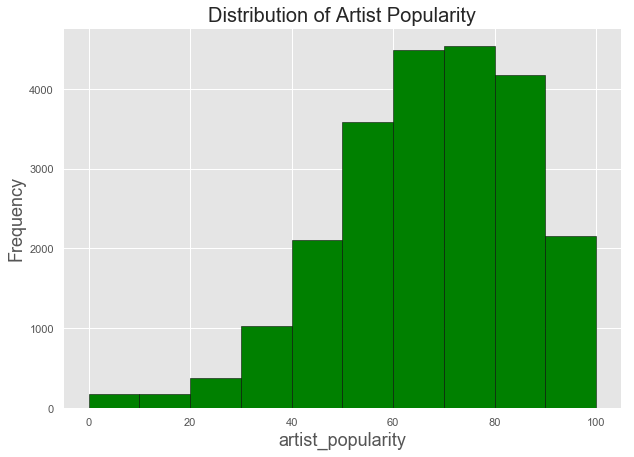

In [6]:
plt.style.use('ggplot')
# Histogram of artist pop
data.artist_popularity.plot(kind='hist',color='green',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Artist Popularity', size=20)
plt.xlabel('artist_popularity', size=18)
plt.ylabel('Frequency', size=18)

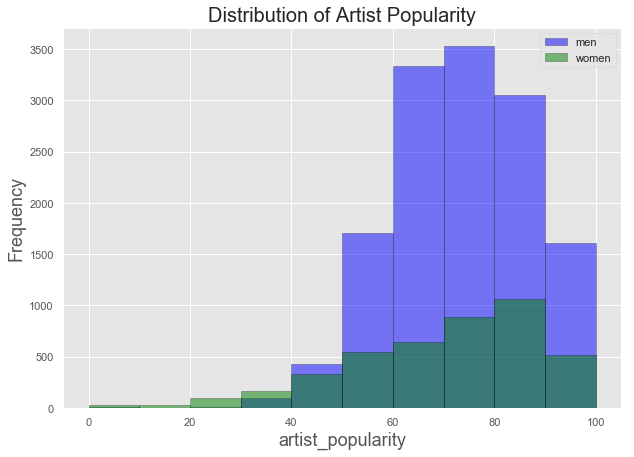

In [7]:
data[data['gender']==1].artist_popularity.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
data[data['gender']==0].artist_popularity.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['men','women'])
plt.title('Distribution of Artist Popularity', size=20)
plt.xlabel('artist_popularity', size=18)
plt.ylabel('Frequency', size=18);

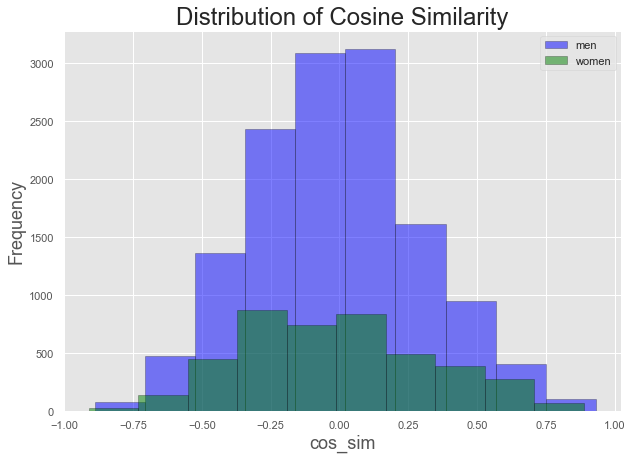

In [8]:
data[data['gender']==1].cos_sim.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
data[data['gender']==0].cos_sim.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['men','women'])
plt.title('Distribution of Cosine Similarity', size=24)
plt.xlabel('cos_sim', size=18)
plt.ylabel('Frequency', size=18);

In [9]:
data2 = data[['gender','artist_popularity','cos_sim','track_popularity']]

# Descriptive statistics men
statistics_male = data2[data2['gender']==1].describe()
statistics_male.rename(columns=lambda x:x+'_men',inplace=True)

# Descriptive statistics women
statistics_female = data2[data2['gender']==0].describe()
statistics_female.rename(columns=lambda x:x+'_women',inplace=True)

statistics = pd.concat([statistics_male,statistics_female], axis=1)
statistics

,gender_men,artist_popularity_men,cos_sim_men,track_popularity_men,gender_women,artist_popularity_women,cos_sim_women,track_popularity_women
count,13775.0,13775.000000,13625.000000,13775.000000,4314.0,4314.00000,4288.000000,4314.000000
mean,1.0,72.881742,-0.012162,53.139383,0.0,69.35605,-0.011349,54.122160
std,0.0,13.279475,0.303905,20.567748,0.0,18.64942,0.339318,21.176932
min,1.0,0.000000,-0.888852,0.000000,0.0,0.00000,-0.911304,0.000000
25%,1.0,64.000000,-0.232151,43.000000,0.0,57.00000,-0.274585,43.000000
50%,1.0,73.000000,-0.007492,56.000000,0.0,73.00000,-0.027336,57.000000
75%,1.0,83.000000,0.174591,67.000000,0.0,84.00000,0.211604,69.000000
max,1.0,100.000000,0.931154,100.000000,0.0,100.00000,0.887372,100.000000


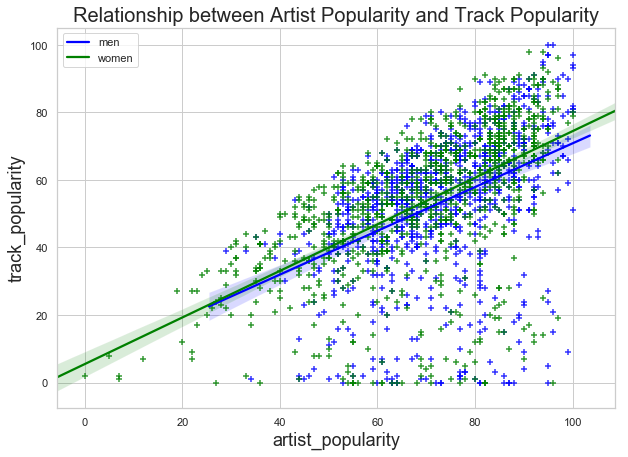

In [408]:
import seaborn as sns

# Samples
men_sample= data[data['gender']==1].sample(1000)
women_sample= data[data['gender']==0].sample(1000)

# Regression plot using seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=men_sample.artist_popularity,y=men_sample.track_popularity,color='blue', marker='+')
sns.regplot(x=women_sample.artist_popularity,y=women_sample.track_popularity,color='green', marker='+')

# Legend, title and labels
plt.legend(labels=['men','women'])
plt.title('Relationship between Artist Popularity and Track Popularity', size=20)
plt.xlabel('artist_popularity', size=18)
plt.ylabel('track_popularity', size=18);

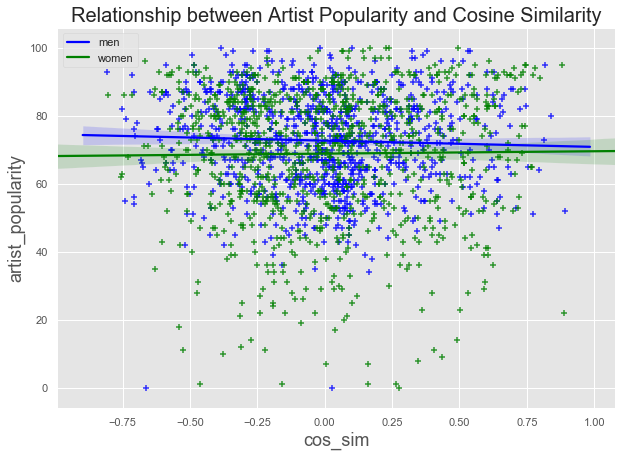

In [74]:
# Samples
men_sample= data[data['gender']==1].sample(1000)
women_sample= data[data['gender']==0].sample(1000)

# Regression plot using seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=men_sample.cos_sim,y=men_sample.artist_popularity,color='blue', marker='+')
sns.regplot(x=women_sample.cos_sim,y=women_sample.artist_popularity,color='green', marker='+')

# Legend, title and labels
plt.legend(labels=['men','women'])
plt.title('Relationship between Artist Popularity and Cosine Similarity', size=20)
plt.xlabel('cos_sim', size=18)
plt.ylabel('artist_popularity', size=18);

### Simple Linear Model

#### Women

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
pd.set_option('mode.chained_assignment', None)
df_women = data[data['gender']==0]
df_women.dropna(subset=['cos_sim'],inplace=True)
df_women.dropna(subset=['genre_similarity'],inplace=True)
linear_regression(df_women[['track_popularity','cos_sim','genre_similarity','valence','acousticness']],df_women[['artist_popularity']])

Coefficient: [[ 0.31684252  0.79635935  8.11972221  0.96535756 -5.83879306]]
Intercept: [50.67811655]
Root mean squared error:  135.93499857326722
R2 score:  0.2860511559538955
                            OLS Regression Results                            
Dep. Variable:      artist_popularity   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     290.6
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          4.45e-262
Time:                        12:04:37   Log-Likelihood:                -14074.
No. Observations:                3632   AIC:                         2.816e+04
Df Residuals:                    3626   BIC:                         2.820e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    st

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
linear_regression(df_women[['artist_popularity','cos_sim','genre_similarity']],df_women[['track_popularity']])

Coefficient: [[ 0.72912417  0.59642223 -0.28435834]]
Intercept: [3.15321995]
Root mean squared error:  311.5847790855704
R2 score:  0.2449478476985152
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     392.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          1.06e-220
Time:                        12:04:40   Log-Likelihood:                -15580.
No. Observations:                3632   AIC:                         3.117e+04
Df Residuals:                    3628   BIC:                         3.119e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Men

In [12]:
df_men = data[data['gender']==1]
df_men.dropna(subset=['cos_sim'],inplace=True)
df_men.dropna(subset=['genre_similarity'],inplace=True)
linear_regression(df_men[['track_popularity','cos_sim','genre_similarity']],df_men[['artist_popularity']])

Coefficient: [[ 0.26343968 -1.4895118   6.2830196 ]]
Intercept: [53.64797123]
Root mean squared error:  130.7338546205319
R2 score:  0.19887533316625639
                            OLS Regression Results                            
Dep. Variable:      artist_popularity   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1109.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:04:43   Log-Likelihood:                -51703.
No. Observations:               13410   AIC:                         1.034e+05
Df Residuals:                   13406   BIC:                         1.034e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Results for both models (artist popularity):

    Men:                                                    Women:
        Coefficient: [[ 0.26343968 -1.4895118 6.2830196 ]]        Coefficient: [[0.32495664 0.89322136 7.81386699]]
        Intercept: [53.64797123]                                  Intercept: [49.37718204]
        Root mean squared error:  130.7338546205319               Root mean squared error:  138.8673499240438
        R2 score:  0.19887533316625639                            R2 score:  0.27065005337400627
        
        (Coefficients: track_popularity, cosine similarity, genre similarity)

### Residual Graphs

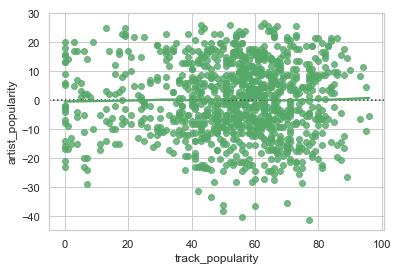

In [436]:
import seaborn as sns
sns.set(style="whitegrid")

sns.residplot(df_men['track_popularity'].sample(1000), df_men['artist_popularity'].sample(1000), lowess=True, color="g")

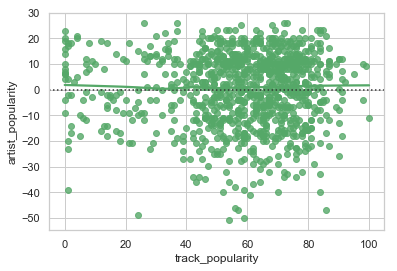

In [437]:
sns.residplot(df_women['track_popularity'].sample(1000), df_women['artist_popularity'].sample(1000), lowess=True, color="g")

### Pearson Correlation Coefficient

In [38]:
df_men = data[data['gender']==1]
df_men = df_men[['track_popularity','artist_popularity','cos_sim','genre_similarity']]
df_men.corr()

,track_popularity,artist_popularity,cos_sim,genre_similarity
track_popularity,1.000000,0.436839,-0.054796,0.020750
artist_popularity,0.436839,1.000000,-0.054816,0.141541
cos_sim,-0.054796,-0.054816,1.000000,-0.013037
genre_similarity,0.020750,0.141541,-0.013037,1.000000


In [39]:
df_women = data[data['gender']==0]
df_women = df_women[['track_popularity','artist_popularity','cos_sim','genre_similarity']]
df_women.corr()

,track_popularity,artist_popularity,cos_sim,genre_similarity
track_popularity,1.000000,0.593178,0.018083,0.098096
artist_popularity,0.593178,1.000000,0.031029,0.208331
cos_sim,0.018083,0.031029,1.000000,0.002859
genre_similarity,0.098096,0.208331,0.002859,1.000000


In [315]:
data[['track_popularity','artist_popularity','cos_sim','genre_similarity']].corr()

,track_popularity,artist_popularity,cos_sim,genre_similarity
track_popularity,1.000000,0.548354,-0.038513,0.042695
artist_popularity,0.548354,1.000000,-0.032377,0.164776
cos_sim,-0.038513,-0.032377,1.000000,-0.012382
genre_similarity,0.042695,0.164776,-0.012382,1.000000


In [ ]:
# note that we're also controlling for the similarity with cosine and genre similarity . suggest, its about the track. perhaps a lack of trust. controlling for popularity we still see there needs to a higher pop

### Linear Regression with gender as independent variable

In [425]:
dummy = pd.get_dummies(data_final['gender'])
dummy.columns = ['gender_woman','gender_man']
reg_data = pd.concat([data_final,dummy], axis=1)

In [426]:
# Drop gender_man column
reg_data_men = reg_data.drop('gender_man',axis=1)

In [427]:
linear_regression(reg_data_men[['gender_woman']],reg_data_men[['artist_popularity']])

Coefficient: [[1.45420676]]
Intercept: [73.21385929]
Root mean squared error:  169.11823780449913
R2 score:  0.0020888936993708196
                            OLS Regression Results                            
Dep. Variable:      artist_popularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     35.18
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.07e-09
Time:                        08:42:15   Log-Likelihood:                -66959.
No. Observations:               16806   AIC:                         1.339e+05
Df Residuals:                   16804   BIC:                         1.339e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [428]:
linear_regression(reg_data_men[['gender_woman','genre_similarity']],reg_data_men[['artist_popularity']])

Coefficient: [[1.57313608 7.53041935]]
Intercept: [66.67712851]
Root mean squared error:  165.07432780812292
R2 score:  0.02595067673739515
                            OLS Regression Results                            
Dep. Variable:      artist_popularity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.16e-96
Time:                        08:42:20   Log-Likelihood:                -66756.
No. Observations:               16806   AIC:                         1.335e+05
Df Residuals:                   16803   BIC:                         1.335e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.0

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [429]:
linear_regression(reg_data_men[['gender_woman','track_popularity']],reg_data_men[['artist_popularity']])

Coefficient: [[0.4005504 0.2814562]]
Intercept: [58.12163482]
Root mean squared error:  136.41496639003515
R2 score:  0.1950601437580637
                            OLS Regression Results                            
Dep. Variable:      artist_popularity   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     2036.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:42:23   Log-Likelihood:                -65153.
No. Observations:               16806   AIC:                         1.303e+05
Df Residuals:                   16803   BIC:                         1.303e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025 

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [430]:
linear_regression(reg_data_men[['gender_woman','track_popularity','cos_sim','genre_similarity']],reg_data_men[['artist_popularity']])

Coefficient: [[ 0.52259205  0.27776518 -0.75235693  6.74430499]]
Intercept: [52.45700091]
Root mean squared error:  133.11358131466343
R2 score:  0.2145405314185419
                            OLS Regression Results                            
Dep. Variable:      artist_popularity   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1147.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:42:28   Log-Likelihood:                -64947.
No. Observations:               16806   AIC:                         1.299e+05
Df Residuals:                   16801   BIC:                         1.299e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err       

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [431]:
linear_regression(reg_data_men[['gender_woman']],reg_data_men[['track_popularity']])

Coefficient: [[3.74358915]]
Intercept: [53.62193002]
Root mean squared error:  412.82840341956074
R2 score:  0.005650779193817734
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     95.50
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.70e-22
Time:                        08:43:28   Log-Likelihood:                -74458.
No. Observations:               16806   AIC:                         1.489e+05
Df Residuals:                   16804   BIC:                         1.489e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [432]:
linear_regression(reg_data_men[['gender_woman','artist_popularity','cos_sim','genre_similarity']],reg_data_men[['track_popularity']])

Coefficient: [[ 2.69961995  0.69360387 -1.39276658 -2.43720243]]
Intercept: [4.9409243]
Root mean squared error:  332.3962173968411
R2 score:  0.19938183267016307
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1046.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:43:32   Log-Likelihood:                -72637.
No. Observations:               16806   AIC:                         1.453e+05
Df Residuals:                   16801   BIC:                         1.453e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err        

/Users/benlebrun/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Logistic Regression (from earlier)

In [174]:
men_sample= data_final[data_final['gender']==1].sample(3500)
women_sample= data_final[data_final['gender']==0].sample(3500)
sample_data = pd.concat([men_sample,women_sample])

In [189]:
log_reg(sample_data[['gender','artist_popularity']])

[[407 271]
 [358 364]]
              precision    recall  f1-score   support

         0.0       0.53      0.60      0.56       678
         1.0       0.57      0.50      0.54       722

    accuracy                           0.55      1400
   macro avg       0.55      0.55      0.55      1400
weighted avg       0.55      0.55      0.55      1400

Optimization terminated successfully.
         Current function value: 0.693084
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000    
Dependent Variable: gender           AIC:              9705.1709
Date:               2019-12-01 09:44 BIC:              9712.0246
No. Observations:   7000             Log-Likelihood:   -4851.6  
Df Model:           0                LL-Null:          -4852.0  
Df Residuals:       6999             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                           

In [192]:
log_reg(sample_data[['gender','artist_popularity','track_popularity']])

[[399 312]
 [316 373]]
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56       711
         1.0       0.54      0.54      0.54       689

    accuracy                           0.55      1400
   macro avg       0.55      0.55      0.55      1400
weighted avg       0.55      0.55      0.55      1400

Optimization terminated successfully.
         Current function value: 0.690460
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.004     
Dependent Variable: gender           AIC:              9670.4395 
Date:               2019-12-01 09:44 BIC:              9684.1468 
No. Observations:   7000             Log-Likelihood:   -4833.2   
Df Model:           1                LL-Null:          -4852.0   
Df Residuals:       6998             LLR p-value:      8.5912e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                    

In [212]:
log_reg(sample_data[['gender','artist_popularity','track_popularity','cos_sim','genre_similarity']])

[[428 244]
 [379 349]]
              precision    recall  f1-score   support

         0.0       0.53      0.64      0.58       672
         1.0       0.59      0.48      0.53       728

    accuracy                           0.56      1400
   macro avg       0.56      0.56      0.55      1400
weighted avg       0.56      0.56      0.55      1400

Optimization terminated successfully.
         Current function value: 0.688976
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006     
Dependent Variable: gender           AIC:              9653.6611 
Date:               2019-12-01 09:57 BIC:              9681.0758 
No. Observations:   7000             Log-Likelihood:   -4822.8   
Df Model:           3                LL-Null:          -4852.0   
Df Residuals:       6996             LLR p-value:      1.2916e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                    

In [311]:
log_reg(sample_data[['gender','artist_popularity','track_popularity','genre_similarity']])

[[420 249]
 [390 341]]
              precision    recall  f1-score   support

         0.0       0.52      0.63      0.57       669
         1.0       0.58      0.47      0.52       731

    accuracy                           0.54      1400
   macro avg       0.55      0.55      0.54      1400
weighted avg       0.55      0.54      0.54      1400

Optimization terminated successfully.
         Current function value: 0.689002
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006     
Dependent Variable: gender           AIC:              9652.0255 
Date:               2019-12-01 13:57 BIC:              9672.5864 
No. Observations:   7000             Log-Likelihood:   -4823.0   
Df Model:           2                LL-Null:          -4852.0   
Df Residuals:       6997             LLR p-value:      2.4994e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                    